# Post Masking Sanity / Overlap Checks

Author: Olaf Borghi olafborghi@gmail.com

## Prepare Setup

### Define fixed parameters, load libraries/modules

**Load modules**

In [3]:
# Import necessary packages and modules
%matplotlib inline
# libraries
import os
import numpy as np
import nibabel as nib
import pandas as pd
import nilearn as nl
from matplotlib import pyplot as plt
# specific modules
from nilearn import plotting, datasets, image
from nilearn.image import math_img
from pathlib import Path
print(nl.__version__) # print nilearn version

0.9.2


**Set fixed parameters**

In [4]:
# fixed folders
basedir = Path("/home/olafb99/mnt/a471/userdata/olafb99/shared/03_AON_ACTION/")
outputdir = Path(basedir / "derivatives")
datadir = Path(basedir / "01_data")
first_level_dir = first_level_dir = outputdir / "first_level"
action_first_level_dir = first_level_dir / "action-task"
AON_first_level_dir = first_level_dir / "AON-task"
masks_templates_dir = outputdir / "masks_templates"
second_level_dir = outputdir / "second_level"
AON_second_level_dir = second_level_dir / "AON-task"
action_second_level_dir = second_level_dir / "action-task"
atlas_dir = outputdir / "brain_atlases"
roi_dir = masks_templates_dir / "ROI_masks"
plot_dir = second_level_dir / "plots"

# load the MNI template
template = datasets.load_mni152_template(resolution=1)

## Load and combine the masks

**Action ROIs**

- Left IPL Action mask
- Right IPL Action mask
- Left IFG Action mask
- Right IFG Action mask
- Left PM Action mask
- Right PM Action mask
- Left M1 Action mask
- Left S1 Action mask
- Right S1 Action mask
- Left S2 Action mask
- Right S2 Action mask

In [5]:
# all ao anatomical regions
all_action_anat = f"{roi_dir}/action_anat_roi_mask.nii.gz"

# action processing region masks
left_ipl = f"{roi_dir}/left_ipl_action_mask.nii.gz"
right_ipl = f"{roi_dir}/right_ipl_action_mask.nii.gz"
left_ifg = f"{roi_dir}/left_ifg_action_mask.nii.gz"
right_ifg = f"{roi_dir}/right_ifg_action_mask.nii.gz"
left_pm = f"{roi_dir}/left_pm_action_mask.nii.gz"
right_pm = f"{roi_dir}/right_pm_action_mask.nii.gz"
left_m1 = f"{roi_dir}/left_m1_action_mask.nii.gz"
left_s1 = f"{roi_dir}/left_s1_action_mask.nii.gz"
right_s1 = f"{roi_dir}/right_s1_action_mask.nii.gz"
left_s2 = f"{roi_dir}/left_s2_action_mask.nii.gz"
right_s2 = f"{roi_dir}/right_s2_action_mask.nii.gz"

**Agent (Face Body) ROIs**

- Left LOC Agent mask
- Right LOC Agent mask
- Left Fusiform Cortex Agent mask
- Right Fusiform Cortex Agent mask
- Left V5 Agent mask
- Right V5 Agent mask
- Left pSTS Agent mask
- Right pSTS Agent mask


In [6]:
# all fb anatomical regions
all_agent_anat = f"{roi_dir}/agent_anat_roi_mask.nii.gz"

# feature processing region masks
left_loc = f"{roi_dir}/left_loc_agent_mask.nii.gz"
right_loc = f"{roi_dir}/right_loc_agent_mask.nii.gz"
left_fusiform = f"{roi_dir}/left_fusiform_cortex_agent_mask.nii.gz"
right_fusiform = f"{roi_dir}/right_fusiform_cortex_agent_mask.nii.gz"
left_v5 = f"{roi_dir}/left_v5_agent_mask.nii.gz"
right_v5 = f"{roi_dir}/right_v5_agent_mask.nii.gz"
left_pSTS = f"{roi_dir}/left_pSTS_agent_mask.nii.gz"
right_pSTS = f"{roi_dir}/right_pSTS_agent_mask.nii.gz"

In [7]:
all_masks = [left_ipl, right_ipl,
             left_ifg, right_ifg,
             left_pm, right_pm,
             left_m1,
             left_s1, right_s1,
             left_s2, right_s2,
             left_loc, right_loc,
             left_fusiform, right_fusiform,
             left_v5, right_v5,
             left_pSTS, right_pSTS]

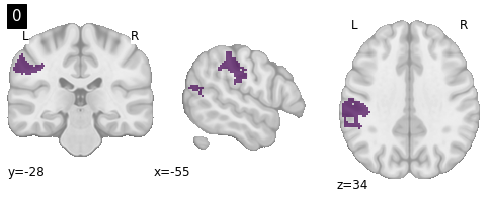

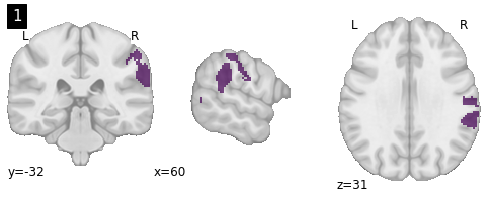

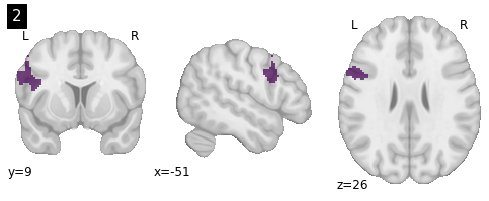

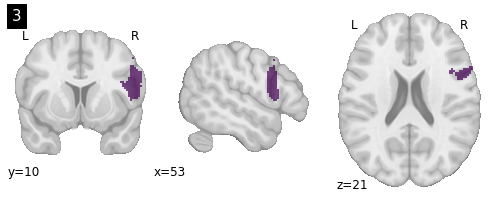

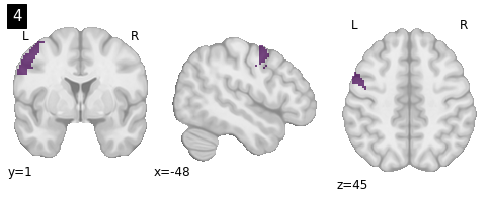

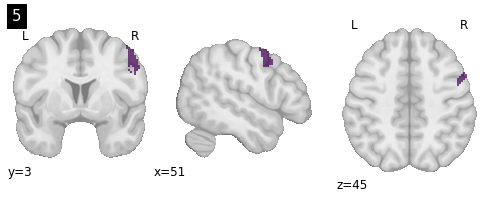

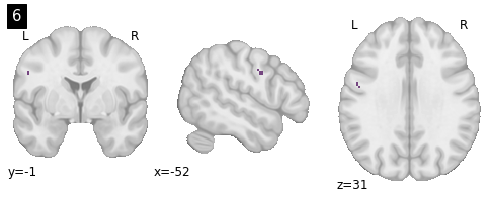

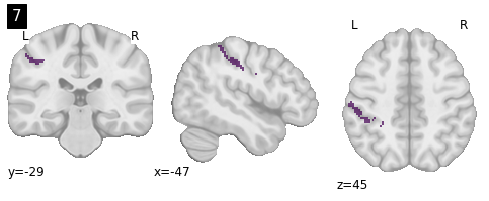

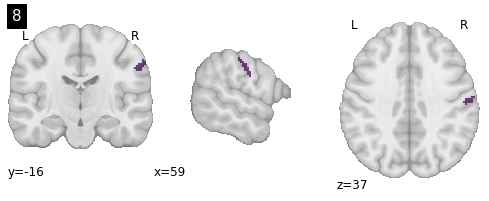

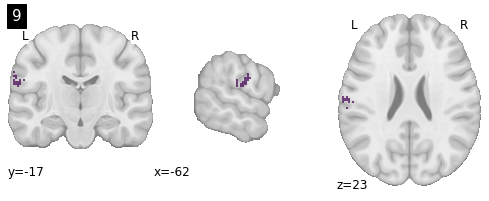

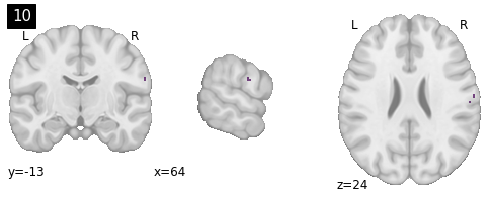

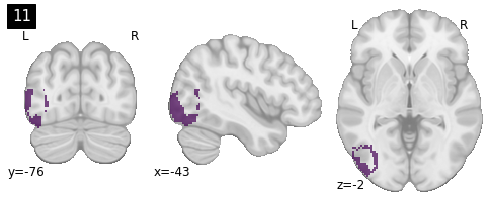

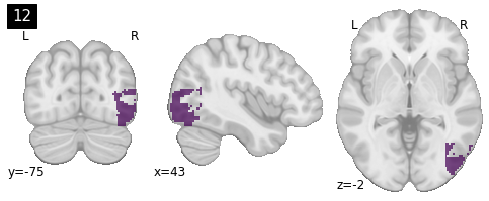

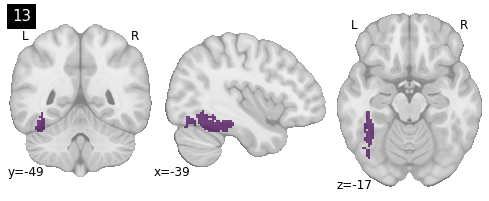

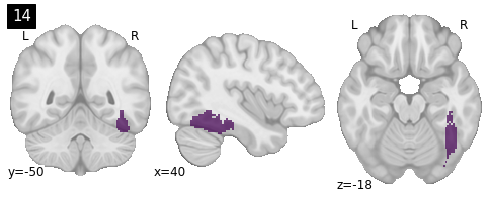

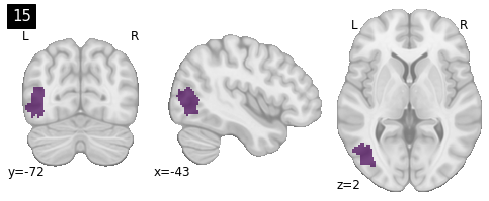

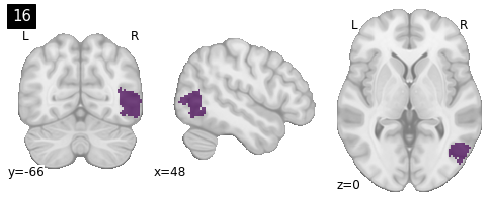

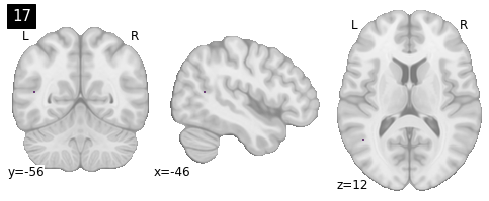

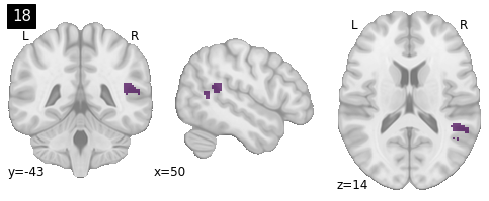

In [8]:
# plot them all
for idx, mask in enumerate(all_masks):
    plotting.plot_roi(mask, title=idx, draw_cross=False, bg_img=template, black_bg=False, cmap="viridis")

Combine them 
- IPL = 1
- IFG = 2
- PM = 3
- M1 = 4
- S1 = 5
- S2 = 6
- LOC = 7
- FUSIFORM = 8
- V5 = 9
- pSTS = 10 

In [9]:
labels = {1:"IPL",
          2:"IFG",
          3:"PM",
          4:"M1",
          5:"S1",
          6:"S2",
          7:"LOC",
          8:"FUSIFORM",
          9:"Area V5",
          10:"pSTS"}

In [10]:
ipl_total = math_img("img1+img2", img1=left_ipl, img2=right_ipl)

ifg_total = math_img("img1+img2", img1=left_ifg, img2=right_ifg)
ifg_total_two = math_img("img*2", img=ifg_total)

pm_total = math_img("img1+img2", img1=left_pm, img2=right_pm)
pm_total_three = math_img("img*3", img = pm_total)

m1_total = nib.load(left_m1)
m1_total_four = math_img("img*4", img = left_m1)

s1_total = math_img("img1+img2", img1=left_s1, img2=right_s1)
s1_total_five = math_img("np.round((img*5),decimals=0)", img = s1_total)

s2_total = math_img("img1+img2", img1=left_s2, img2=right_s2)
s2_total_six = math_img("img*6", img = s2_total)

loc_total = math_img("img1+img2", img1=left_loc, img2=right_loc)
loc_total_seven = math_img("np.round((img*7),decimals=0)", img = loc_total)

fusiform_total = math_img("img1+img2", img1=left_fusiform, img2=right_fusiform)
fusiform_total_eight = math_img("np.round((img*8),decimals=0)", img = fusiform_total)

v5_total = math_img("img1+img2", img1=left_v5, img2=right_v5)
v5_total_nine = math_img("np.round((img*9),decimals=0)", img = v5_total)

pSTS_total = math_img("img1+img2", img1=left_pSTS, img2=right_pSTS)
pSTS_total_ten = math_img("np.round((img*10),decimals=0)", img = pSTS_total)

# and add them up
roi_atlas = math_img("img1+img2+img3+img4+img5+img6+img7+img8+img9+img10", 
                     img1=ipl_total, 
                     img2=ifg_total_two, 
                     img3=pm_total_three, 
                     img4=m1_total_four,
                     img5=s1_total_five,
                     img6=s2_total_six,
                     img7=loc_total_seven,
                     img8=fusiform_total_eight,
                     img9=v5_total_nine,
                     img10=pSTS_total_ten)

In [11]:
# quick sanity check
roi_int_labels = np.unique(roi_atlas.get_fdata())
n_regions = roi_int_labels.size

print(f"There are {n_regions} different regions in the mask! Check here if the mask has eleven discrete values: {roi_int_labels}")

There are 11 different regions in the mask! Check here if the mask has eleven discrete values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


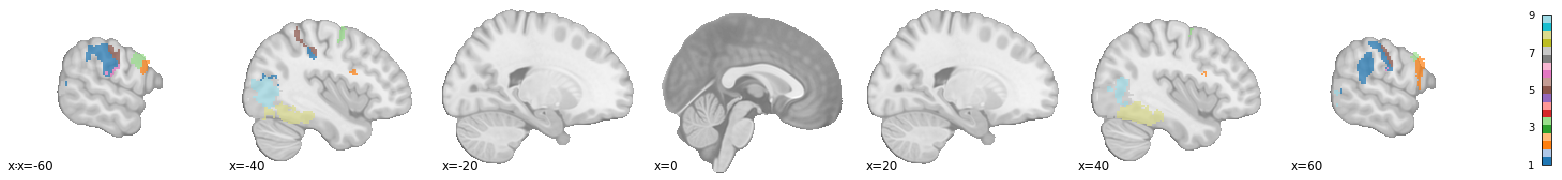

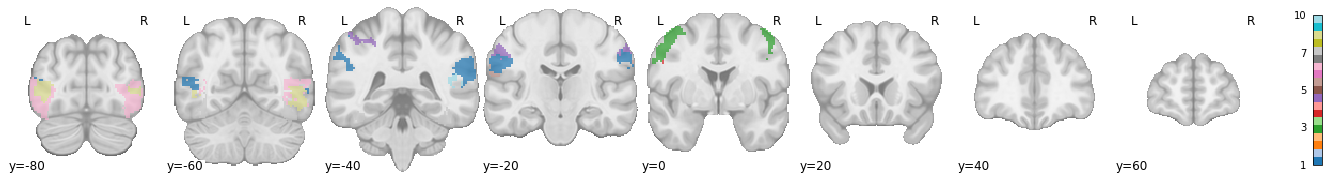

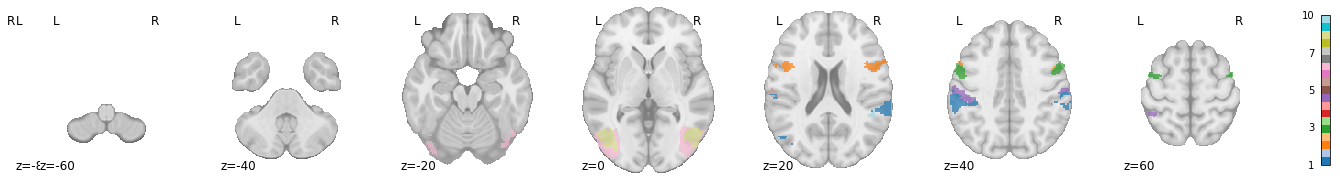

In [12]:
roi_plot_x = plotting.plot_roi(roi_atlas, display_mode = 'x', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

roi_plot_y = plotting.plot_roi(roi_atlas, display_mode = 'y', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

roi_plot_z = plotting.plot_roi(roi_atlas, display_mode = 'z', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

In [13]:
# save the stuff
roi_atlas_path = f"{roi_dir}/all_rois_mask.nii.gz"
roi_atlas.to_filename(roi_atlas_path)

----
Quick overlap check 

In [14]:
def MyOverlapCalculator(mask1, mask2):
    # load mask data
    mask1_data = mask1.get_fdata()
    mask2_data = mask2.get_fdata()
    
    # plot both masks
    plot = plotting.plot_roi(mask1, draw_cross=False, display_mode = 'x', cut_coords=np.arange(-80,80,20), bg_img=template, black_bg=False, cmap="viridis", alpha=0.7)
    plot.add_contours(mask2, filled=False, alpha=1, colors="k")
    
    # calculate the number of overlapping voxels
    overlap = np.sum((mask1_data > 0) & (mask2_data > 0))
    print("Number of overlapping voxels:", overlap)

- IPL = 1
- IFG = 2
- PM = 3
- M1 = 4
- S1 = 5
- S2 = 6
- LOC = 7
- FUSIFORM = 8
- V5 = 9
- pSTS = 10 

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


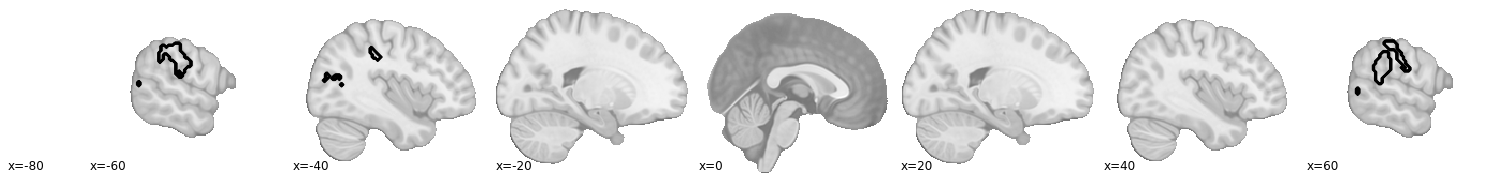

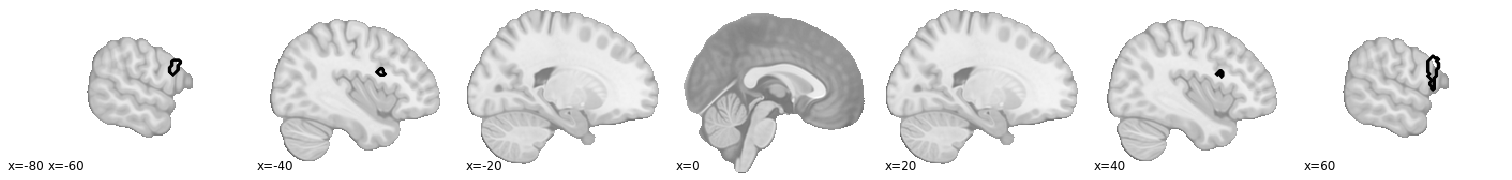

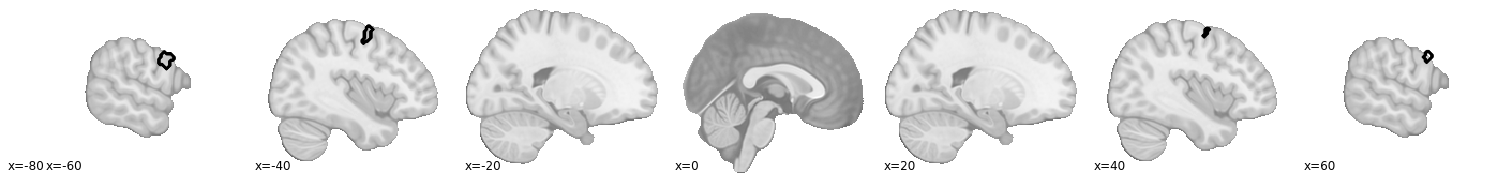

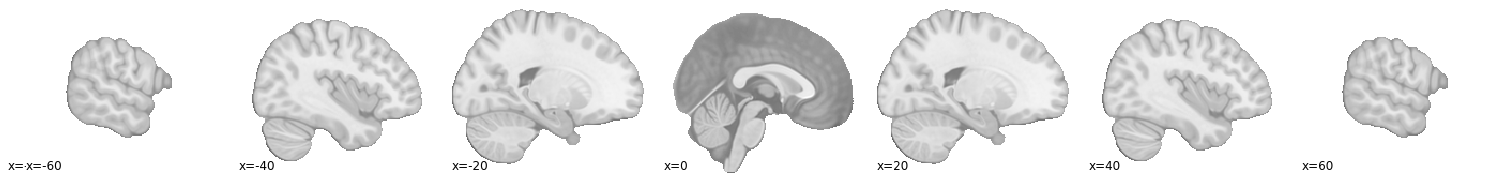

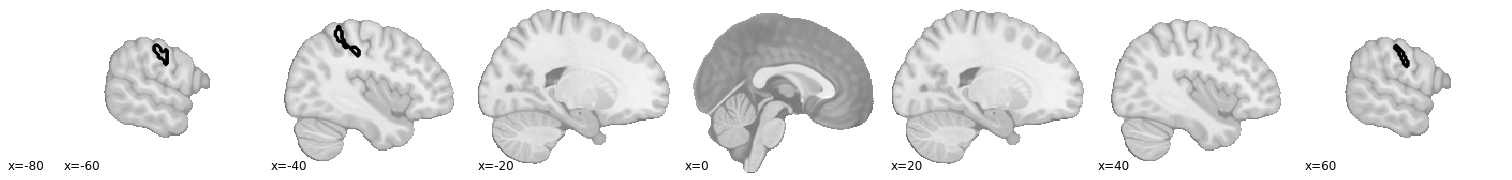

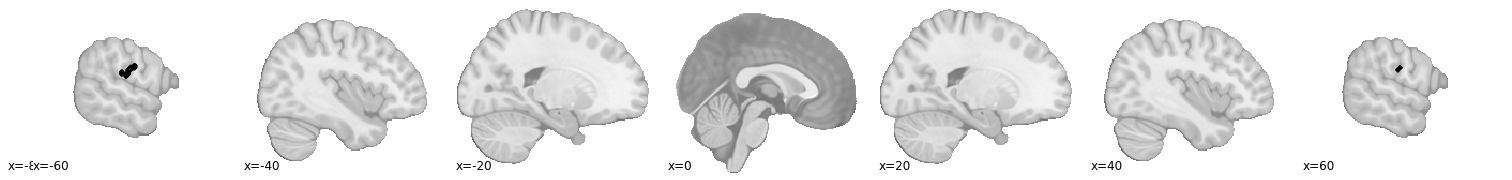

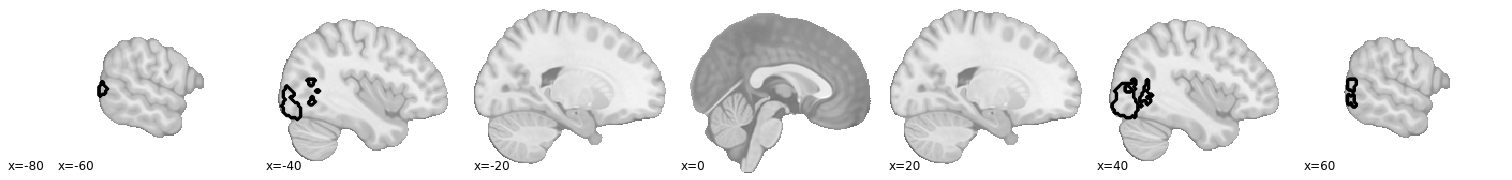

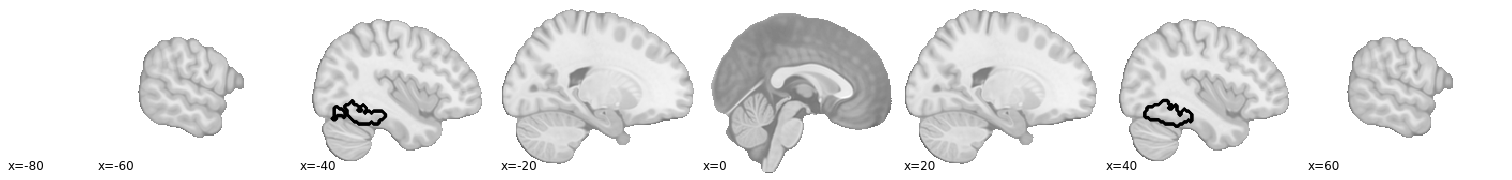

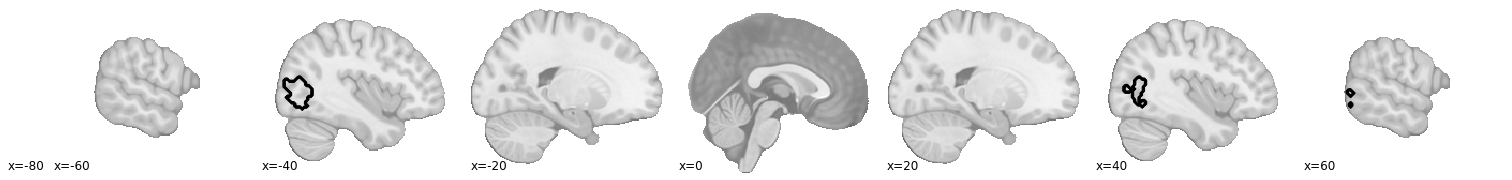

In [15]:
MyOverlapCalculator(pSTS_total, ipl_total)
MyOverlapCalculator(pSTS_total, ifg_total)
MyOverlapCalculator(pSTS_total, pm_total)
MyOverlapCalculator(pSTS_total, m1_total)
MyOverlapCalculator(pSTS_total, s1_total)
MyOverlapCalculator(pSTS_total, s2_total)
MyOverlapCalculator(pSTS_total, loc_total)
MyOverlapCalculator(pSTS_total, fusiform_total)
MyOverlapCalculator(pSTS_total, v5_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


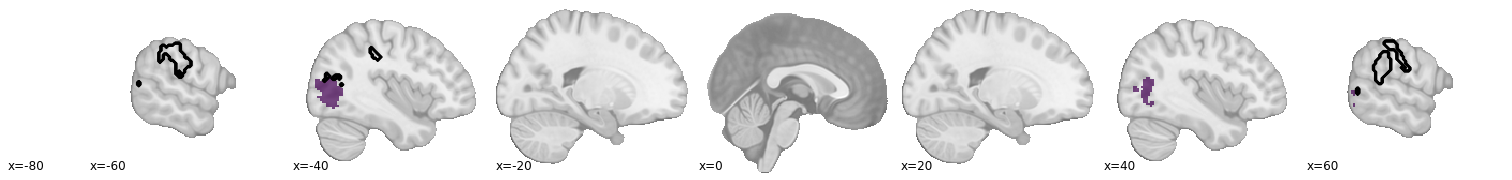

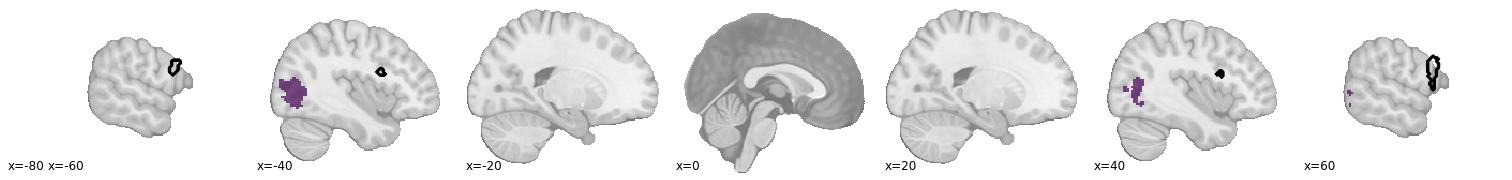

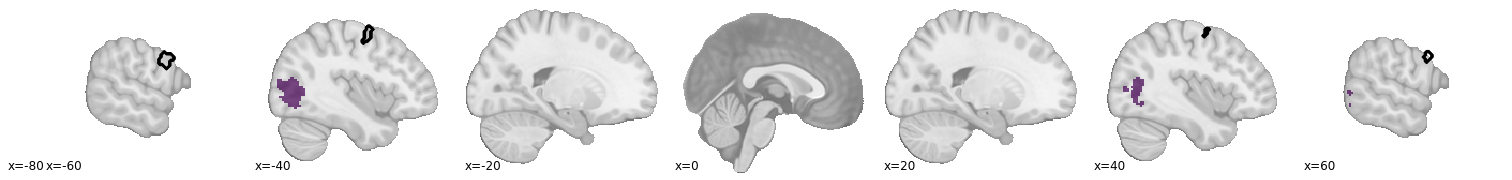

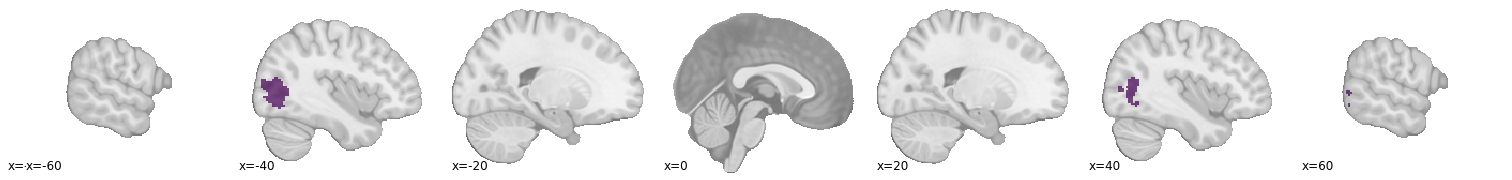

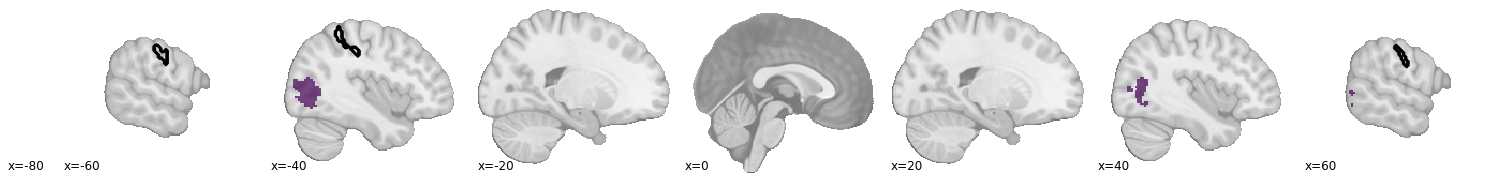

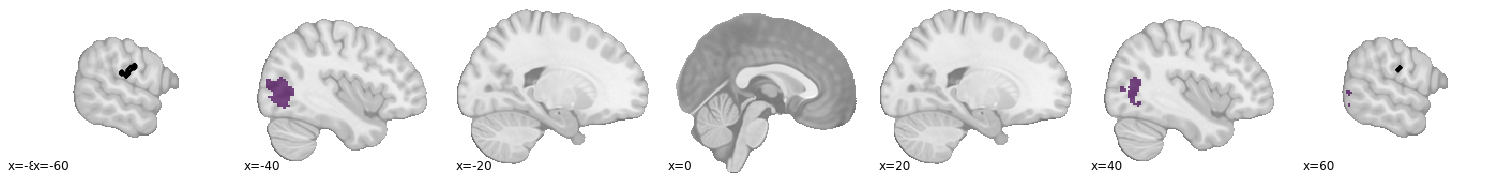

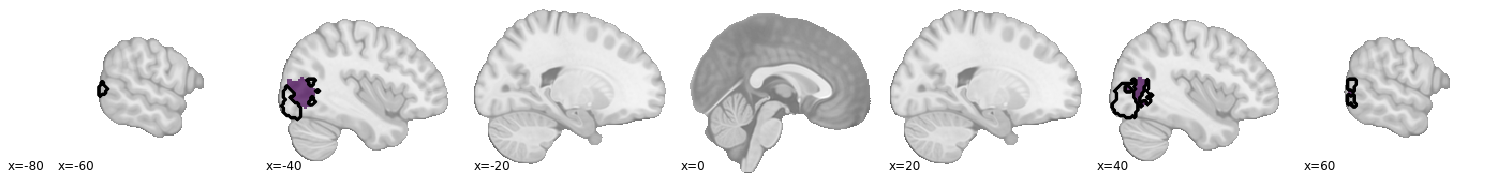

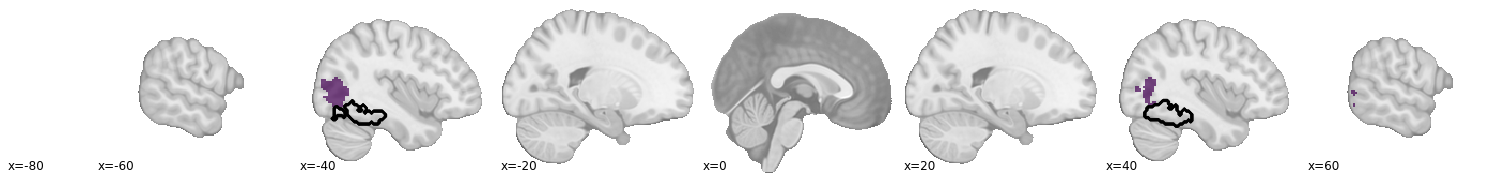

In [16]:
MyOverlapCalculator(v5_total, ipl_total)
MyOverlapCalculator(v5_total, ifg_total)
MyOverlapCalculator(v5_total, pm_total)
MyOverlapCalculator(v5_total, m1_total)
MyOverlapCalculator(v5_total, s1_total)
MyOverlapCalculator(v5_total, s2_total)
MyOverlapCalculator(v5_total, loc_total)
MyOverlapCalculator(v5_total, fusiform_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


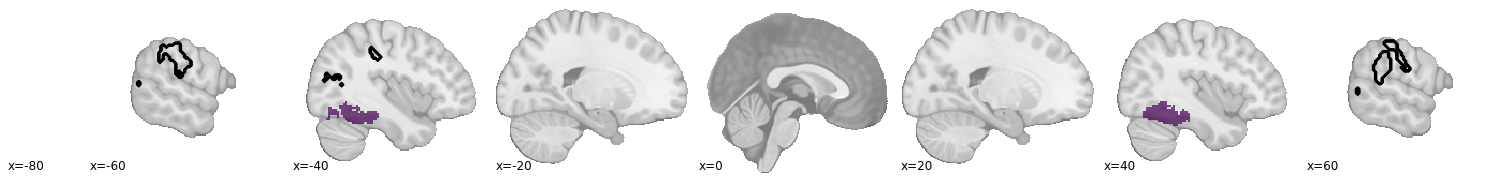

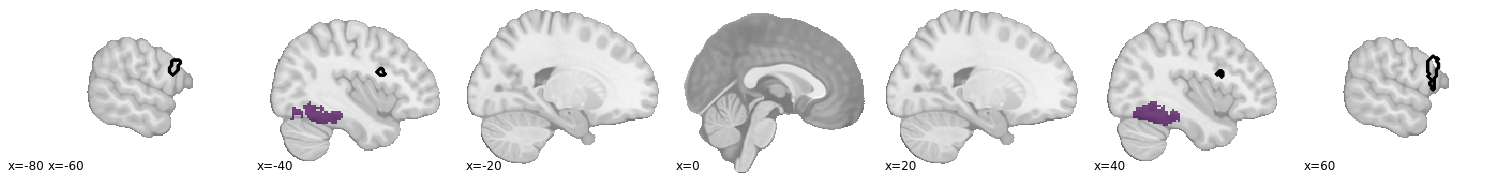

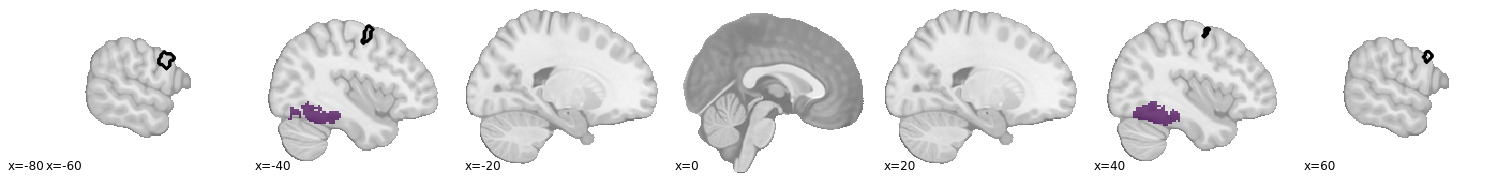

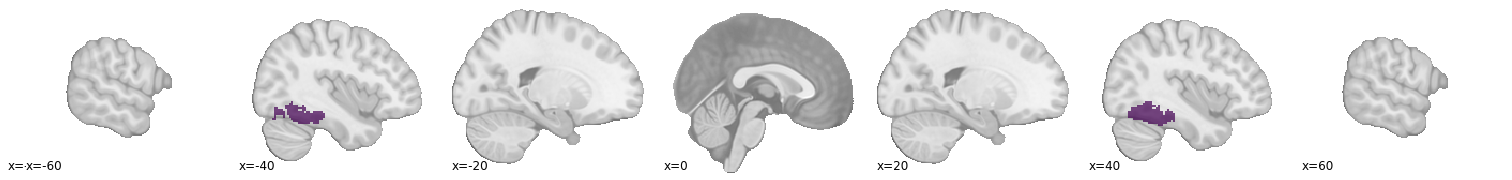

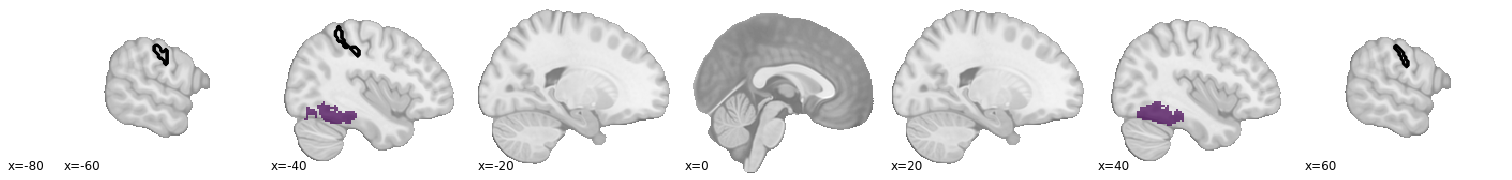

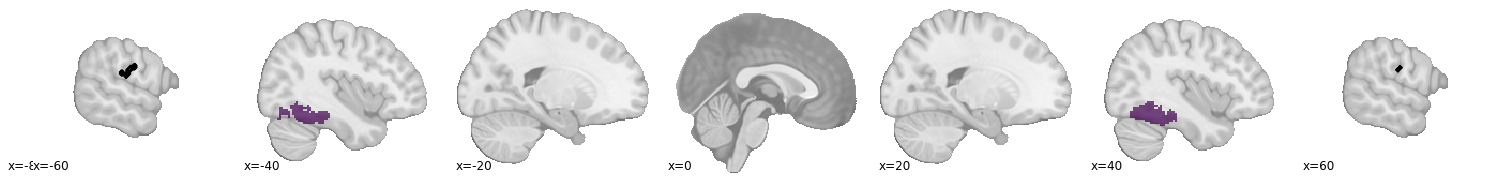

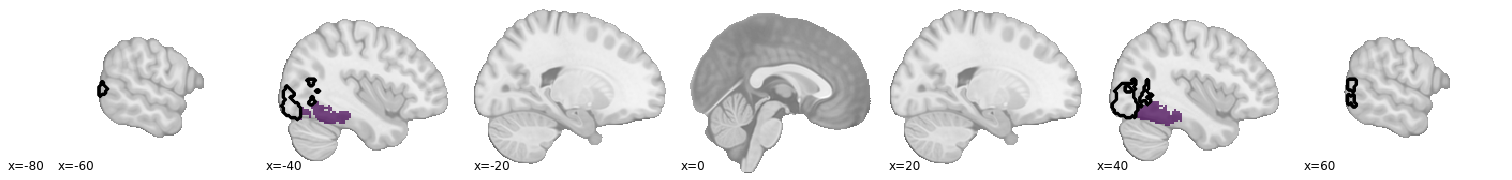

In [17]:
MyOverlapCalculator(fusiform_total, ipl_total)
MyOverlapCalculator(fusiform_total, ifg_total)
MyOverlapCalculator(fusiform_total, pm_total)
MyOverlapCalculator(fusiform_total, m1_total)
MyOverlapCalculator(fusiform_total, s1_total)
MyOverlapCalculator(fusiform_total, s2_total)
MyOverlapCalculator(fusiform_total, loc_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


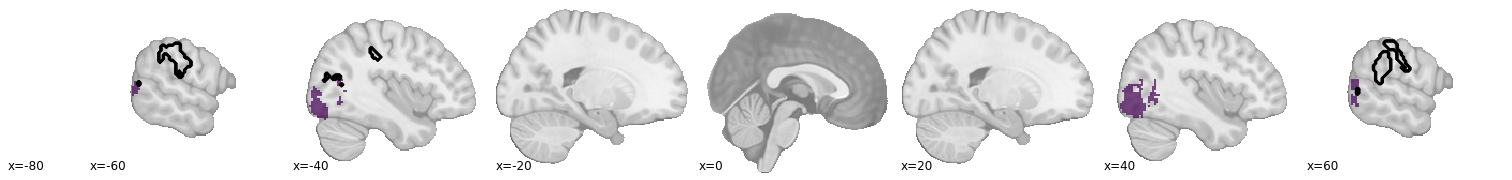

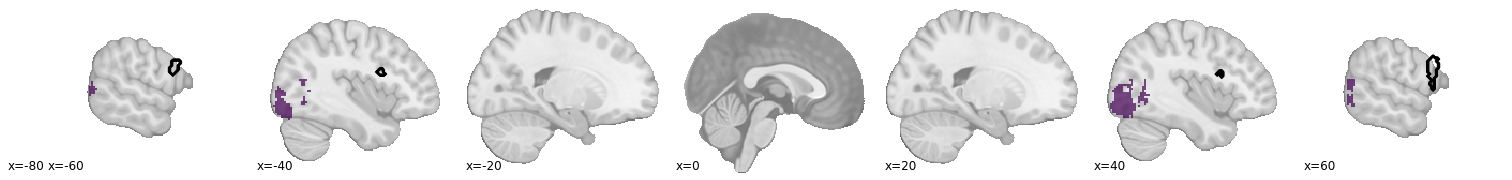

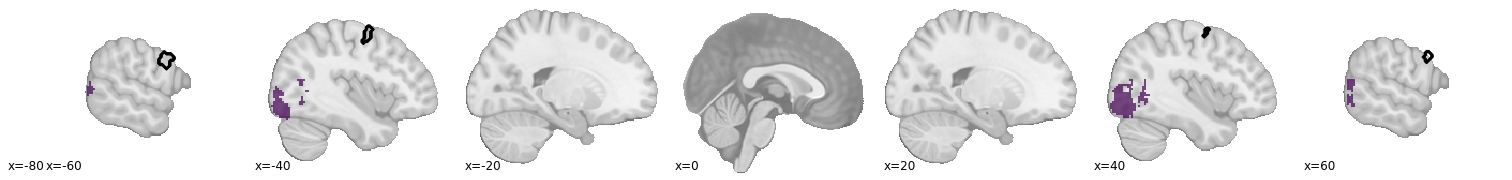

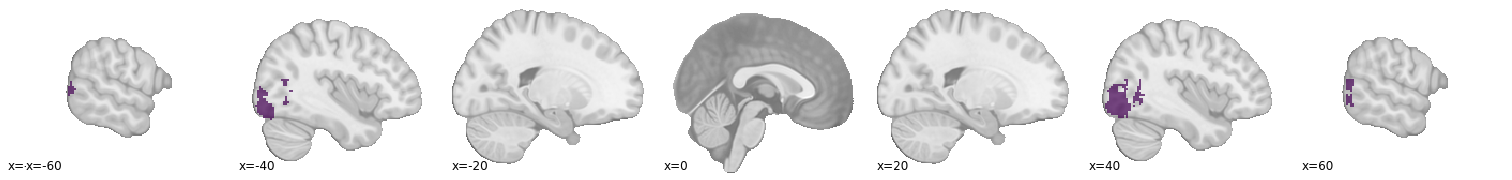

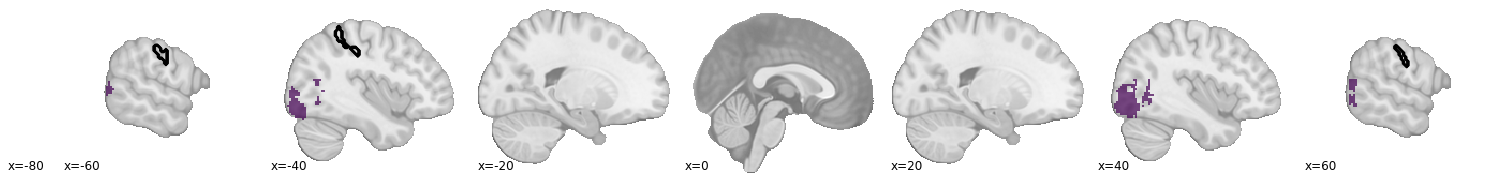

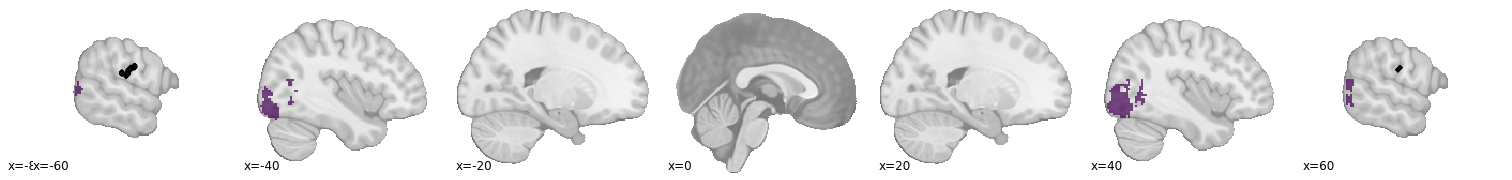

In [18]:
MyOverlapCalculator(loc_total, ipl_total)
MyOverlapCalculator(loc_total, ifg_total)
MyOverlapCalculator(loc_total, pm_total)
MyOverlapCalculator(loc_total, m1_total)
MyOverlapCalculator(loc_total, s1_total)
MyOverlapCalculator(loc_total, s2_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


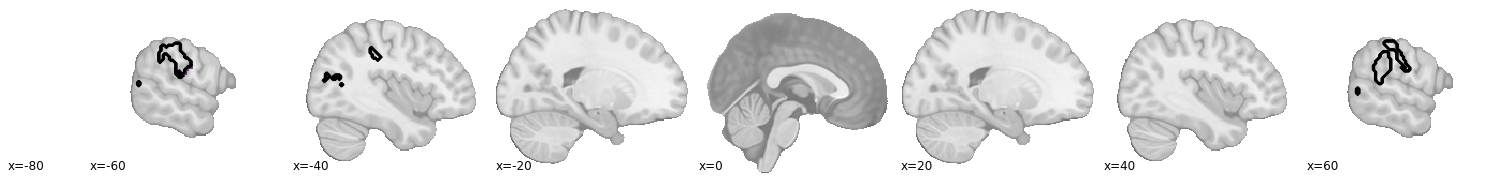

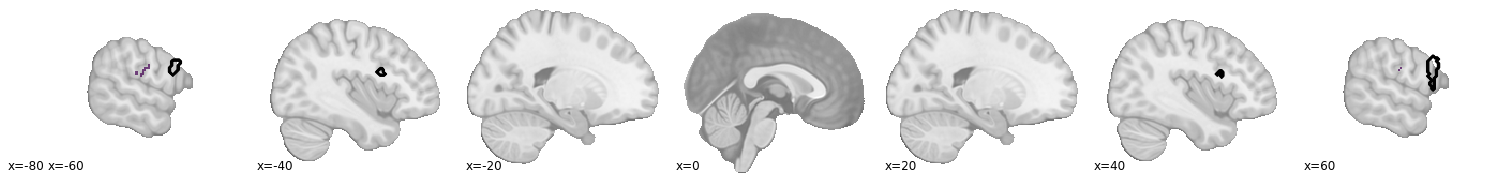

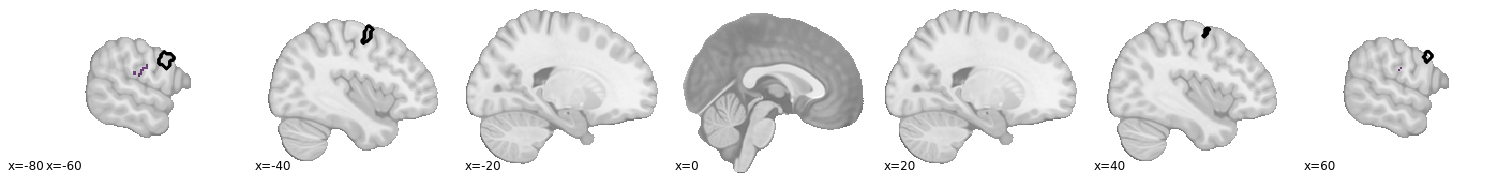

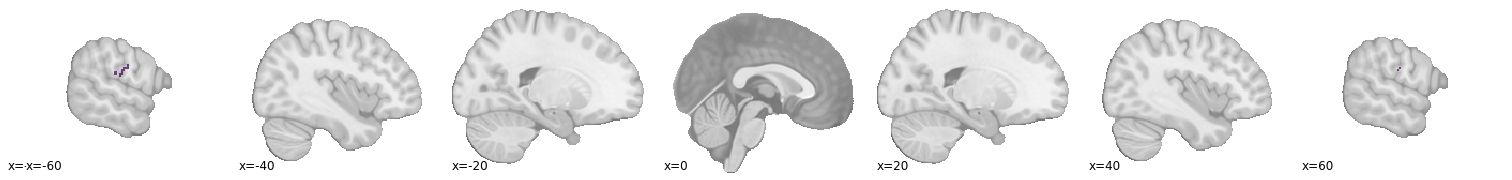

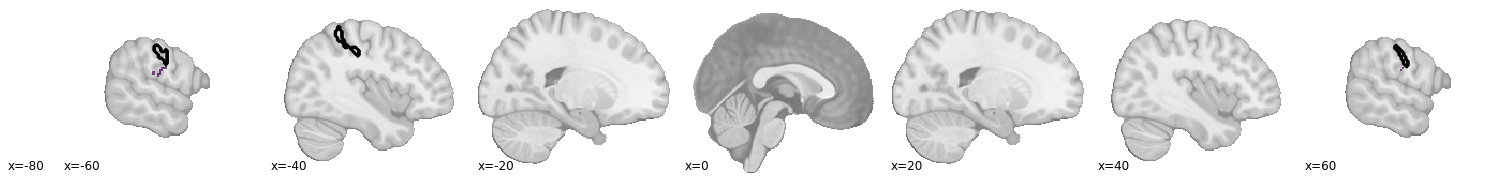

In [19]:
MyOverlapCalculator(s2_total, ipl_total)
MyOverlapCalculator(s2_total, ifg_total)
MyOverlapCalculator(s2_total, pm_total)
MyOverlapCalculator(s2_total, m1_total)
MyOverlapCalculator(s2_total, s1_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


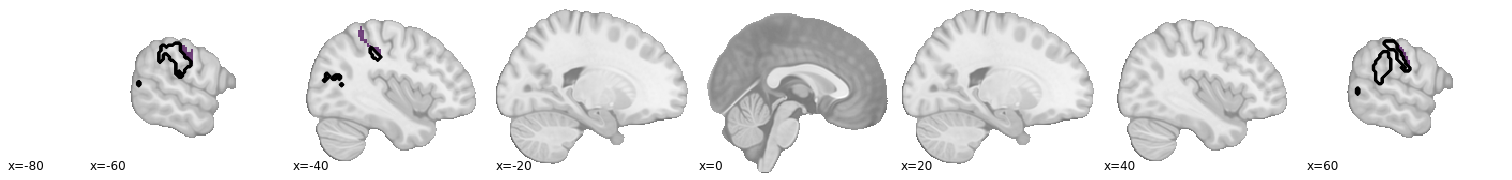

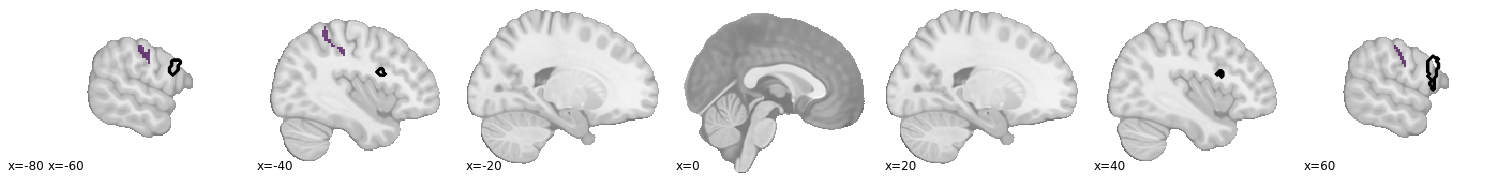

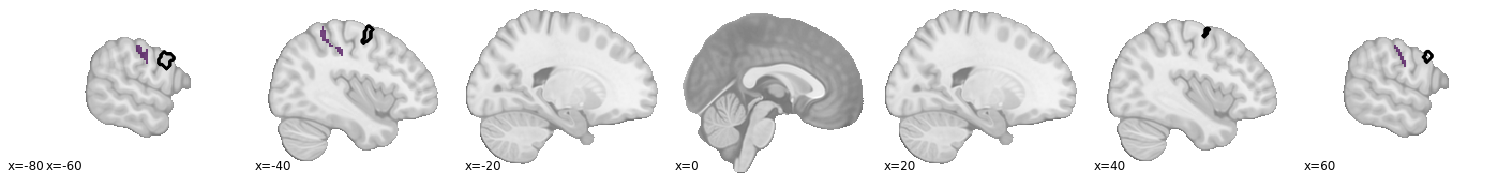

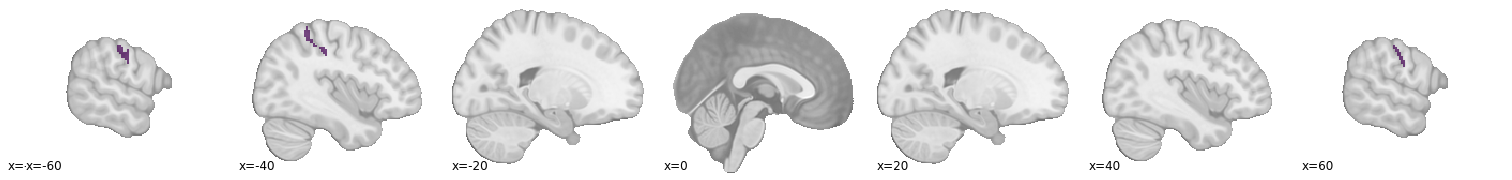

In [20]:
MyOverlapCalculator(s1_total, ipl_total)
MyOverlapCalculator(s1_total, ifg_total)
MyOverlapCalculator(s1_total, pm_total)
MyOverlapCalculator(s1_total, m1_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0
Number of overlapping voxels: 0


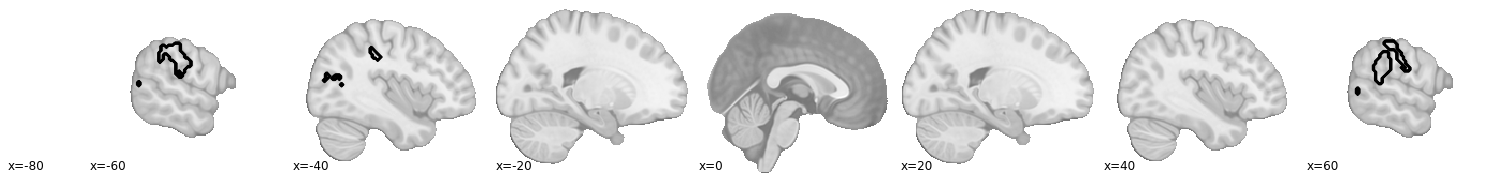

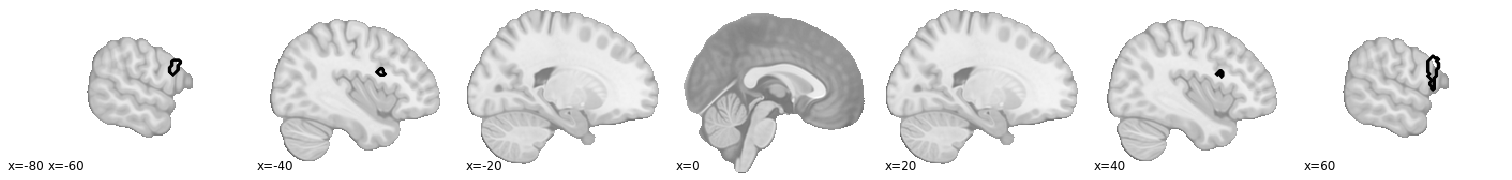

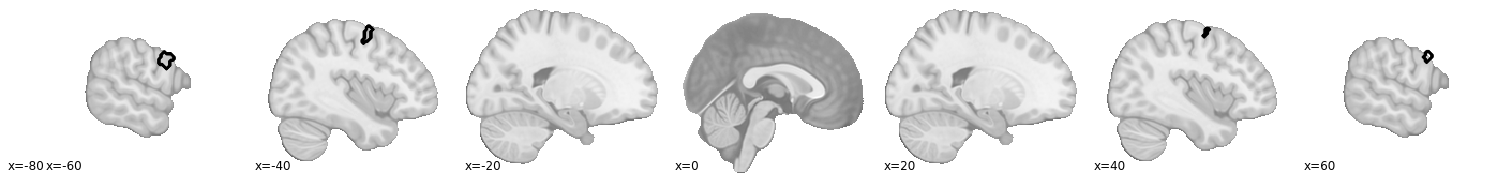

In [21]:
MyOverlapCalculator(m1_total, ipl_total)
MyOverlapCalculator(m1_total, ifg_total)
MyOverlapCalculator(m1_total, pm_total)

Number of overlapping voxels: 0
Number of overlapping voxels: 0


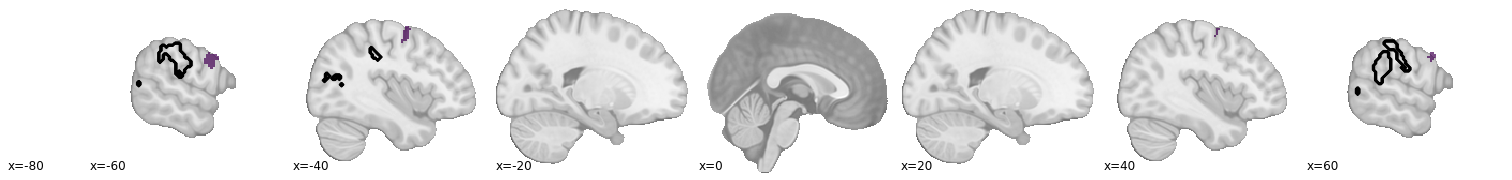

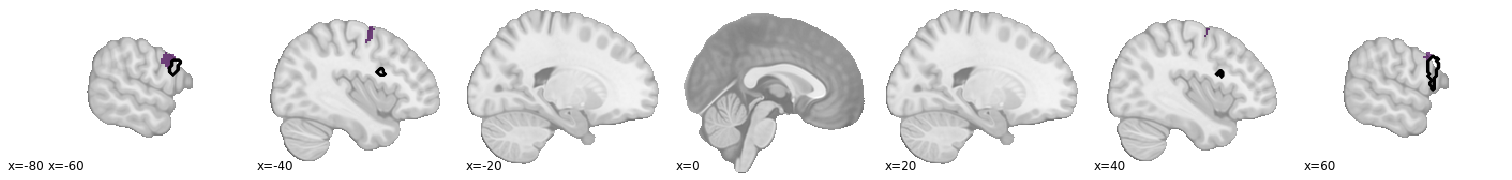

In [22]:
MyOverlapCalculator(pm_total, ipl_total)
MyOverlapCalculator(pm_total, ifg_total)

Number of overlapping voxels: 0


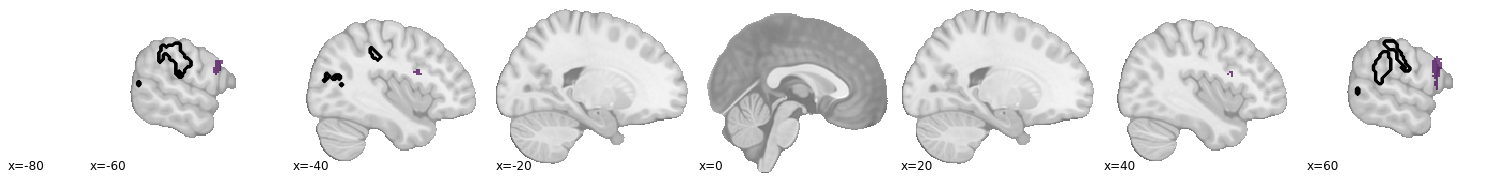

In [23]:
MyOverlapCalculator(ifg_total, ipl_total)

------------------
